#QR Code Generator


In [ ]:
  !pip -q install diffusers transformers torch xformers qrcode accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.1/989.1 kB 8.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.0/167.0 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 6.7 MB/s eta 0:00:00


In [ ]:
import qrcode
from PIL import Image

In [ ]:
class QrCodeGenerator():
    def __init__(self):
        self.qr = qrcode.QRCode(
            version = 1,
            error_correction = qrcode.constants.ERROR_CORRECT_H,
            box_size = 16,
            border = 0,
        )
    def generator_qr(self, qr_content: str):
        self.qr.add_data(qr_content)
        self.qr.make(fit=True)

        img =self.qr.make_image(fill_color='black', back_color='white')
        return img.get_image()
    def add_offset_background(self, img: Image, offset_min: int = 0) :
      w,h = img.size
      w = (w + 255 + offset_min)
      h = (h + 255 + offset_min)

      if(w > 1024) :
        raise ValueError('Qr Code is too big, please generate another shorter URL!')
      bg_image = Image.new('L', (w,h), 255)
      coords = ( (w-img.size[0]) // 2 // 16*16,
                 (h-img.size[1]) // 2 // 16*16)
      bg_image.paste(img,coords)
      return bg_image


In [ ]:
qrcode_gen = QrCodeGenerator()
qrcode_img = qrcode_gen.generator_qr('https://www.facebook.com/fudaohambang0/')
bg_qrcode_img = qrcode_gen.add_offset_background(qrcode_img)

In [ ]:
from diffusers import ControlNetModel, StableDiffusionControlNetImg2ImgPipeline, DDIMScheduler
import torch
from diffusers.utils import load_image
from typing import Tuple

In [ ]:
controlnet = ControlNetModel.from_pretrained("DionTimmer/controlnet_qrcode-control_v1p_sd15",torch_dtype=torch.float16)

In [ ]:
from diffusers.pipelines.stable_diffusion import safety_checker
cn_pipeline = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    safety_checker = None,
    torch_dtype = torch.float16
)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet_img2img.StableDiffusionControlNetImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [ ]:
cn_pipeline.enable_xformers_memory_efficient_attention()
cn_pipeline.scheduler = DDIMScheduler.from_config(cn_pipeline.scheduler.config)
cn_pipeline.enable_model_cpu_offload()

In [ ]:
IMG_WIDTH = 768
IMG_HEIGHT = 768
def resize_for_input_image(input_image: Image, resolution : Tuple[int,int]= (IMG_WIDTH,IMG_HEIGHT)):
    input_image = input_image.convert("RGB")
    img = input_image.resize(resolution, resample = Image.LANCZOS)
    return img
#QR Code Image
condition_image = resize_for_input_image(bg_qrcode_img)
#Init Image
init_image = load_image("./1.jpg")
init_image = resize_for_input_image(init_image)

In [ ]:
generator = torch.Generator()

  0%|          | 0/27 [00:00<?, ?it/s]

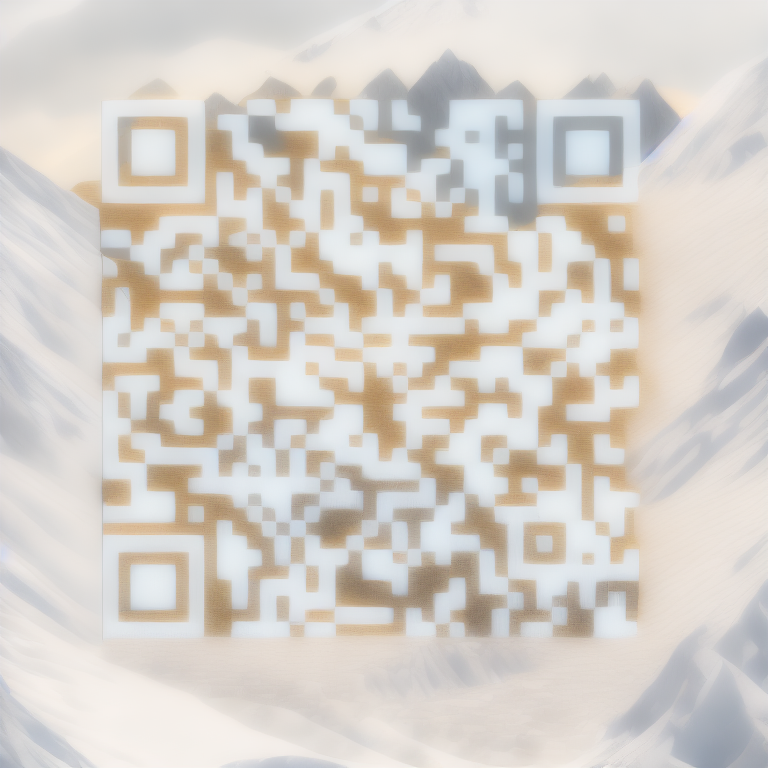

In [ ]:
output = cn_pipeline(
    prompt = "Anime Background", #description
    negative_prompt="ugly, disfigured, low quality, blurry, nsfw",
    image = init_image,
    control_image = condition_image,
    width = IMG_WIDTH,
    height = IMG_HEIGHT,
    guidance_scale = 7.5,
    controlnet_conditioning_scale = 2.1,
    generator = generator,
    strength = 0.9,
    num_inference_steps=30,

)
output.images[0]

#Translator


In [ ]:
pip install googletrans==4.0.0rc1

In [ ]:
import googletrans
from googletrans import Translator

In [ ]:
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [ ]:
translator = Translator()
text = "Xin Chào"
lang = translator.detect(text).lang
# print(lang)

vi


In [ ]:
translated_text = translator.translate(text, src = lang, dest = "en")
print(translated_text)

Hello
Xin Chào
{'confidence': None, 'parts': [<googletrans.models.TranslatedPart object at 0x7c881b590a30>], 'origin_pronunciation': None, 'parsed': [[None, None, None, [[[0, [[[None, 8]], [True]]]], 8], [['Xin Chào', None, None, 8]], None, ['Xin Chào', 'vi', 'en', True]], [[[None, None, None, None, None, [['Hello', None, None, None, [['Hello', [4, 5, 11], []], ['Hi', [2], []]]]], None, None, None, []]], 'en', 1, 'vi', ['Xin Chào', 'vi', 'en', True]], 'vi', ['Xin chào!', None, None, None, None, [[[None, [['Hello!', None, ['Alô!', 'Chào anh!', 'Chào chị!', 'Ô nài!', 'Xin chào!'], 1, True]], 'en', 'vi', 9]], 1], None, None, 'vi', 1]]}
